# Sustainable energy transitions data model

In [3]:
import pandas as pd, numpy as np, json, copy, zipfile, random, requests, StringIO

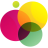

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import Image 
Image('favicon.png') 

## Country and region name converters

In [5]:
#country name converters

#EIA->pop
clist1={'North America':'Northern America',
'United States':'United States of America',
'Central & South America':'Latin America and the Caribbean',
'Bahamas, The':'Bahamas',
'Saint Vincent/Grenadines':'Saint Vincent and the Grenadines',
'Venezuela':'Venezuela (Bolivarian Republic of)',
'Macedonia':'The former Yugoslav Republic of Macedonia',
'Moldova':'Republic of Moldova',
'Russia':'Russian Federation',
'Iran':'Iran (Islamic Republic of)',
'Palestinian Territories':'State of Palestine',
'Syria':'Syrian Arab Republic',
'Yemen':'Yemen ',
'Congo (Brazzaville)':'Congo',
'Congo (Kinshasa)':'Democratic Republic of the Congo',
'Cote dIvoire (IvoryCoast)':"C\xc3\xb4te d'Ivoire",
'Gambia, The':'Gambia',
'Libya':'Libyan Arab Jamahiriya',
'Reunion':'R\xc3\xa9union',
'Somalia':'Somalia ',
'Sudan and South Sudan':'Sudan',
'Tanzania':'United Republic of Tanzania',
'Brunei':'Brunei Darussalam',
'Burma (Myanmar)':'Myanmar',
'Hong Kong':'China, Hong Kong Special Administrative Region',
'Korea, North':"Democratic People's Republic of Korea",
'Korea, South':'Republic of Korea',
'Laos':"Lao People's Democratic Republic",
'Macau':'China, Macao Special Administrative Region',
'Timor-Leste (East Timor)':'Timor-Leste',
'Virgin Islands,  U.S.':'United States Virgin Islands',
'Vietnam':'Viet Nam'}

#BP->pop
clist2={u'                 European Union #':u'Europe',
u'Rep. of Congo (Brazzaville)':u'Congo (Brazzaville)',
'Republic of Ireland':'Ireland',
'China Hong Kong SAR':'China, Hong Kong Special Administrative Region',
u'Total Africa':u'Africa',
u'Total North America':u'Northern America',
u'Total S. & Cent. America':'Latin America and the Caribbean',
u'Total World':u'World',
u'Total World ':u'World',
'South Korea':'Republic of Korea',
u'Trinidad & Tobago':u'Trinidad and Tobago',
u'US':u'United States of America'}

#WD->pop
clist3={u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Congo, Rep.':u'Congo (Brazzaville)',
u'Caribbean small states':'Carribean',
u'East Asia & Pacific (all income levels)':'Eastern Asia',
u'Egypt, Arab Rep.':'Egypt',
u'European Union':u'Europe',
u'Hong Kong SAR, China':u'China, Hong Kong Special Administrative Region',
u'Iran, Islamic Rep.':u'Iran (Islamic Republic of)',
u'Kyrgyz Republic':u'Kyrgyzstan',
u'Korea, Rep.':u'Republic of Korea',
u'Latin America & Caribbean (all income levels)':'Latin America and the Caribbean',
u'Macedonia, FYR':u'The former Yugoslav Republic of Macedonia',
u'Korea, Dem. Rep.':u"Democratic People's Republic of Korea",
u'South Asia':u'Southern Asia',
u'Sub-Saharan Africa (all income levels)':u'Sub-Saharan Africa',
u'Slovak Republic':u'Slovakia',
u'Venezuela, RB':u'Venezuela (Bolivarian Republic of)',
u'Yemen, Rep.':u'Yemen ',
u'Congo, Dem. Rep.':u'Democratic Republic of the Congo'}

#COMTRADE->pop
clist4={u"Bosnia Herzegovina":"Bosnia and Herzegovina",
u'Central African Rep.':u'Central African Republic',
u'China, Hong Kong SAR':u'China, Hong Kong Special Administrative Region',
u'China, Macao SAR':u'China, Macao Special Administrative Region',
u'Czech Rep.':u'Czech Republic',
u"Dem. People's Rep. of Korea":"Democratic People's Republic of Korea",
u'Dem. Rep. of the Congo':"Democratic Republic of the Congo",
u'Dominican Rep.':u'Dominican Republic',
u'Fmr Arab Rep. of Yemen':u'Yemen ',
u'Fmr Ethiopia':u'Ethiopia',
u'Fmr Fed. Rep. of Germany':u'Germany',
u'Fmr Panama, excl.Canal Zone':u'Panama',
u'Fmr Rep. of Vietnam':u'Viet Nam',
u"Lao People's Dem. Rep.":u"Lao People's Democratic Republic",
u'Occ. Palestinian Terr.':u'State of Palestine',
u'Rep. of Korea':u'Republic of Korea',
u'Rep. of Moldova':u'Republic of Moldova',
u'Serbia and Montenegro':u'Serbia',
u'US Virgin Isds':u'United States Virgin Islands',
u'Solomon Isds':u'Solomon Islands',
u'United Rep. of Tanzania':u'United Republic of Tanzania',
u'TFYR of Macedonia':u'The former Yugoslav Republic of Macedonia',
u'USA':u'United States of America',
u'USA (before 1981)':u'United States of America',
}

#Jacobson->pop
clist5={u"Korea, Democratic People's Republic of":"Democratic People's Republic of Korea",
u'All countries':u'World',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Iran, Islamic Republic of':u'Iran (Islamic Republic of)',
u'Macedonia, Former Yugoslav Republic of':u'The former Yugoslav Republic of Macedonia',
u'Congo, Democratic Republic of':u"Democratic Republic of the Congo",
u'Korea, Republic of':u'Republic of Korea',
u'Tanzania, United Republic of':u'United Republic of Tanzania',
u'Moldova, Republic of':u'Republic of Moldova',
u'Hong Kong, China':u'China, Hong Kong Special Administrative Region',
u'All countries.1':"World"
}

#NREL solar->pop
clist6={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u"Brunei":u'Brunei Darussalam',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u"Iran":u'Iran (Islamic Republic of)',
u"Laos":u"Lao People's Democratic Republic",
u"Libya":'Libyan Arab Jamahiriya',
u"Moldova":u'Republic of Moldova',
u"North Korea":"Democratic People's Republic of Korea",
u"Reunion":'R\xc3\xa9union',
u'Sao Tome & Principe':u'Sao Tome and Principe',
u'Solomon Is.':u'Solomon Islands',
u'St. Lucia':u'Saint Lucia',
u'St. Vincent & the Grenadines':u'Saint Vincent and the Grenadines',
u'The Bahamas':u'Bahamas',
u'The Gambia':u'Gambia',
u'Virgin Is.':u'United States Virgin Islands',
u'West Bank':u'State of Palestine'
}

#NREL wind->pop
clist7={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u'Occupied Palestinian Territory':u'State of Palestine',
u'China Macao SAR':u'China, Macao Special Administrative Region',
#"C\xc3\xb4te d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'East Timor':u'Timor-Leste',
u'TFYR Macedonia':u'The former Yugoslav Republic of Macedonia',
u'IAM-country Total':u'World'
}

#country entroids->pop
clist8={u'Burma':'Myanmar',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Republic of the Congo':u'Congo (Brazzaville)',
u'Reunion':'R\xc3\xa9union'
}

def cnc(country):
    if country in clist1: return clist1[country]
    elif country in clist2: return clist2[country]
    elif country in clist3: return clist3[country]
    elif country in clist4: return clist4[country]
    elif country in clist5: return clist5[country]
    elif country in clist6: return clist6[country]
    elif country in clist7: return clist7[country]
    elif country in clist8: return clist8[country]
    else: return country

# Population

Consult the notebook entitled *pop.ipynb* for the details of mining the data from the UN statistics division online database.   
Due to being the reference database for country names cell, the cell below needs to be run first, before any other databases.

In [6]:
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED

In [7]:
#pop_path='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/
pop_path='E:/Dropbox/Public/datarepo/Set/db/'

In [8]:
#suppres warnings
import warnings
warnings.simplefilter(action = "ignore")

In [9]:
cc=pd.read_excel(pop_path+'Country Code and Name ISO2 ISO3.xls')
#http://unstats.un.org/unsd/tradekb/Attachment321.aspx?AttachmentType=1

In [10]:
ccs=cc['Country Code'].values

In [11]:
neighbors=pd.read_csv(pop_path+'contry-geotime.csv')
#https://raw.githubusercontent.com/ppKrauss/country-geotime/master/data/contry-geotime.csv

In [12]:
#country name converter from iso to comtrade and back
iso2c={}
isoc2={}
for i in cc.T.iteritems():
    iso2c[i[1][0]]=i[1][1]
    isoc2[i[1][1]]=i[1][0]

In [13]:
#country name converter from pop to iso
pop2iso={}
for i in cc.T.iteritems():
    pop2iso[cnc(i[1][1])]=int(i[1][0])

In [14]:
#country name converter from alpha 2 to iso
c2iso={}
for i in neighbors.T.iteritems():
    c2iso[str(i[1][0])]=i[1][1]
c2iso['NA']=c2iso['nan'] #adjust for namibia
c2iso.pop('nan');

In [15]:
#create country neighbor adjacency list based on iso country number codes
c2neighbors={}
for i in neighbors.T.iteritems():
    z=str(i[1][4]).split(' ')
    if (str(i[1][1])!='nan'): c2neighbors[int(i[1][1])]=[c2iso[k] for k in z if k!='nan']

In [16]:
#extend iso codes not yet encountered
iso2c[729]="Sudan"
iso2c[531]="Curacao"
iso2c[535]="Bonaire, Sint Eustatius and Saba"
iso2c[728]="South Sudan"
iso2c[534]="Sint Maarten (Dutch part)"
iso2c[652]="Saint Barthélemy"

In [17]:
#load h2 min
h2=json.loads(file(pop_path+'h2.json','r').read())

In [18]:
#load tradealpha d
predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}

In [37]:
#load savedata
predata=json.loads(file(pop_path+'savedata4.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

In [20]:
#load grids
grid=json.loads(file(pop_path+'grid.json','r').read())
grid5=json.loads(file(pop_path+'grid5.json','r').read())
gridz=json.loads(file(pop_path+'gridz.json','r').read())
gridz5=json.loads(file(pop_path+'gridz5.json','r').read())

In [21]:
#load ndists
ndists=json.loads(file(pop_path+'ndists.json','r').read())
distancenorm=7819.98

In [38]:
#load goodcountries
goodcountries=list(set(data.keys()).intersection(set(tradealpha.keys())))
#goodcountries=goodcountries[:20] #dev
rgc={} #reverse goodcountries coder
for i in range(len(goodcountries)):
    rgc[goodcountries[i]]=i
cid={} #reverse goodcountries coder
for i in range(len(goodcountries)):
    cid[goodcountries[i]]=i

In [23]:
def save3(sd,countrylist=[]):
#if True:
    popsave={}
    countries=[]
    if countrylist==[]:
        c=sorted(goodcountries)
    else: c=countrylist
    for country in c:
        popdummy={}
        tosave=[]
        for year in data[country]:
            popdummy[year]=data[country][year]['population']
            for fuel in data[country][year]['energy']:
            #for fuel in allfuels:
                if fuel not in {'nrg','nrg_sum'}:
                    tosave.append({"t":year,"u":fuel,"g":"f","q1":"pp","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['prod']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['prod']['navg3']))) else \
                               data[country][year]['energy'][fuel]['prod']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['prod'] else 0,3)
                               })
                    tosave.append({"t":year,"u":fuel,"g":"m","q1":"cc","q2":999,
                               "s":round(0 if (('navg3' in data[country][year]['energy'][fuel]['cons']) \
                                          and (np.isnan(data[country][year]['energy'][fuel]['cons']['navg3']))) else \
                               data[country][year]['energy'][fuel]['cons']['navg3'] if \
                                   'navg3' in data[country][year]['energy'][fuel]['cons'] else 0,3)
                              })
            
            #save balances - only for dev
            #if (year > min(balance.keys())):
            #    if year in balance:
            #        if country in balance[year]:
            #            tosave.append({"t":year,"u":"balance","g":"m","q1":"cc","q2":999,
            #                   "s":balance[year][country]})
        
        #no import export flows on global
        if country not in {"World"}:
            flowg={"Import":"f","Export":"m","Re-Export":"m","Re-Import":"f"}
            if country in tradealpha:
                for year in tradealpha[country]:
                    for fuel in tradealpha[country][year]:
                        for flow in tradealpha[country][year][fuel]:
                            for partner in tradealpha[country][year][fuel][flow]:
                                tosave.append({"t":int(float(year)),"u":fuel,"g":flowg[flow],"q1":flow,"q2":partner,
                                           "s":round(tradealpha[country][year][fuel][flow][partner],3)
                                           })
        
        popsave[country]=popdummy
        
        countries.append(country)
        file('E:/Dropbox/Public/datarepo/Set/json/'+str(sd)+'/data.json','w').write(json.dumps(tosave)) 
        zf = zipfile.ZipFile('E:/Dropbox/Public/datarepo/Set/json/'+str(sd)+'/'+str(country.encode('utf-8').replace('/','&&'))+'.zip', mode='w')
        zf.write('E:/Dropbox/Public/datarepo/Set/json/'+str(sd)+'/data.json','data.json',compress_type=compression)
        zf.close()
        
    #save all countries list
    file('E:/Dropbox/Public/datarepo/Set/universal/countries.json','w').write(json.dumps(countries)) 
    
    #save countries populations
    #file('E:/Dropbox/Public/datarepo/Set/json/pop.json','w').write(json.dumps(popsave))     

## Impex updating

In [24]:
def updatenormimpex(reporter,partner,flow,value,weight=0.1):
    global mimportmatrix
    global mexportmatrix
    global mrimportmatrix
    global mrexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        nexportmatrix[i][j]=(nexportmatrix[i][j]*(1-weight))+(value*weight)
        nrimportmatrix[j][i]=(nrimportmatrix[j][i]*(1-weight))+(value*weight)
    if flow in {"Import","Re-Import"}:
        nimportmatrix[i][j]=(nrimportmatrix[i][j]*(1-weight))+(value*weight)
        nrexportmatrix[j][i]=(nrexportmatrix[j][i]*(1-weight))+(value*weight)
    return

def influence(reporter,partner,selfinfluence=1.0,expfactor=3.0):
    #country trade influence will tend to have an exponential distribution, therefore we convert to linear 
    #with a strength of expfactor
    i=cid[reporter]
    j=cid[partner]
    if i==j: return selfinfluence
    else: return (12.0/36*nimportmatrix[i][j]\
        +6.0/36*nexportmatrix[j][i]\
        +4.0/36*nrimportmatrix[i][j]\
        +2.0/36*nrexportmatrix[j][i]\
        +6.0/36*nexportmatrix[i][j]\
        +3.0/36*nimportmatrix[j][i]\
        +2.0/36*nrexportmatrix[i][j]\
        +1.0/36*nrimportmatrix[j][i])**(1.0/expfactor)

In [25]:
#load
predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}

In [26]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from matplotlib.ticker import NullFormatter
path = 'Inconsolata-Bold.ttf'
prop = font_manager.FontProperties(fname=path)
labeler=json.loads(file(pop_path+'../universal/labeler.json','r').read())
isoico=json.loads(file(pop_path+'../universal/isoico.json','r').read())
risoico=json.loads(file(pop_path+'../universal/risoico.json','r').read())

In [27]:
labs=[]
labs2=[]
labs3=[]
    
def dendro(sd='00',selfinfluence=1.0,expfactor=3.0):
    matrix=scipy.zeros([len(goodcountries),len(goodcountries)])
    global labs
    global labs2
    global labs3
    for i in range(len(goodcountries)):
        labs.append(labeler[goodcountries[i]])
        labs2.append(goodcountries[i])
        labs3.append(isoico[goodcountries[i]])
        for j in range(len(goodcountries)):
            matrix[i][j]=influence(goodcountries[i],goodcountries[j],selfinfluence,expfactor)

    title='Partner Importance of COLUMN Country for ROW Country in Energy Trade'
    #cmap=plt.get_cmap('RdYlGn_r') #for logplot
    cmap=plt.get_cmap('YlGnBu')
    labelpad=32

    # Generate random features and distance matrix.
    D = scipy.zeros([len(matrix),len(matrix)])
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            D[i,j] =matrix[i][j]

    # Compute and plot first dendrogram.
    fig = pylab.figure(figsize=(17,15))
    sch.set_link_color_palette(10*["#ababab"])

    # Plot original matrix.
    axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
    im = axmatrix.matshow(D[::-1], aspect='equal', origin='lower', cmap=cmap)
    #im = axmatrix.matshow(E[::-1], aspect='auto', origin='lower', cmap=cmap) #for logplot
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.87,0.1,0.02,0.6])
    pylab.colorbar(im, cax=axcolor)

    # Label up
    axmatrix.set_xticks(range(len(matrix)))
    mlabs=list(labs)
    for i in range(len(labs)):
        kz='-'
        for k in range(labelpad-len(labs[i])):kz+='-'
        if i%2==1: mlabs[i]=kz+u' '+labs[i]+u' '+'-'
        else: mlabs[i]='-'+u' '+labs[i]+u' '+kz
    axmatrix.set_xticklabels(mlabs, minor=False,fontsize=7,fontproperties=prop)
    axmatrix.xaxis.set_label_position('top')
    axmatrix.xaxis.tick_top()
    pylab.xticks(rotation=-90, fontsize=8)
    axmatrix.set_yticks(range(len(matrix)))
    mlabs=list(labs)
    for i in range(len(labs)):
        kz='-'
        for k in range(labelpad-len(labs[i])):kz+='-'
        if i%2==0: mlabs[i]=kz+u' '+labs[i]+u' '+'-'
        else: mlabs[i]='-'+u' '+labs[i]+u' '+kz
    axmatrix.set_yticklabels(mlabs[::-1], minor=False,fontsize=7,fontproperties=prop)
    axmatrix.yaxis.set_label_position('left')
    axmatrix.yaxis.tick_left()
    xlabels = axmatrix.get_xticklabels() 
    for label in range(len(xlabels)): 
        xlabels[label].set_rotation(90) 
    axmatrix.text(1.1, 0.5, title,
            horizontalalignment='left',
            verticalalignment='center',rotation=270,
            transform=axmatrix.transAxes,size=10)
    axmatrix.xaxis.grid(False)
    axmatrix.yaxis.grid(False)

    plt.savefig('E:/Dropbox/Public/datarepo/Set/json/'+str(sd)+'/'+'si'+str(selfinfluence)+'expf'+str(expfactor)+'dendrogram.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1, )
    plt.close()
    
    m1='centroid'
    m2='single'
    # Compute and plot first dendrogram.
    fig = pylab.figure(figsize=(17,15))
    ax1 = fig.add_axes([0.1245,0.1,0.1,0.6])
    Y = sch.linkage(D, method=m1)
    Z1 = sch.dendrogram(Y,above_threshold_color="#ababab", orientation='left')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_axis_bgcolor('None')

    # Compute and plot second dendrogram.
    ax2 = fig.add_axes([0.335,0.825,0.5295,0.1])
    Y = sch.linkage(D, method=m2)
    Z2 = sch.dendrogram(Y,above_threshold_color="#ababab")
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_axis_bgcolor('None')

    # Plot distance matrix.
    axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
    idx1 = Z1['leaves']
    idx2 = Z2['leaves']
    #D = E[idx1,:] #for logplot
    D = D[idx1,:]
    D = D[:,idx2]
    im = axmatrix.matshow(D, aspect='equal', origin='lower', cmap=cmap)
    axmatrix.set_xticks([])
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.87,0.1,0.02,0.6])
    ac=pylab.colorbar(im, cax=axcolor)

    # Label up
    axmatrix.set_xticks(np.arange(len(matrix))-0)
    mlabs=list(np.array(labs)[idx2])
    for i in range(len(np.array(labs)[idx2])):
        kz='-'
        for k in range(labelpad-len(np.array(labs)[idx2][i])):kz+='-'
        if i%2==1: mlabs[i]=kz+u' '+np.array(labs)[idx2][i]+u' '+'-'
        else: mlabs[i]='-'+u' '+np.array(labs)[idx2][i]+u' '+kz
    axmatrix.set_xticklabels(mlabs, minor=False,fontsize=7,fontproperties=prop)
    axmatrix.xaxis.set_label_position('top')
    axmatrix.xaxis.tick_top()
    pylab.xticks(rotation=-90, fontsize=8)
    axmatrix.set_yticks(np.arange(len(matrix))+0)
    mlabs=list(np.array(labs)[idx1])
    for i in range(len(np.array(labs)[idx1])):
        kz='-'
        for k in range(labelpad-len(np.array(labs)[idx1][i])):kz+='-'
        if i%2==0: mlabs[i]=kz+u' '+np.array(labs)[idx1][i]+u' '+'-'
        else: mlabs[i]='-'+u' '+np.array(labs)[idx1][i]+u' '+kz
    axmatrix.set_yticklabels(mlabs, minor=False,fontsize=7,fontproperties=prop)
    axmatrix.yaxis.set_label_position('left')
    axmatrix.yaxis.tick_left()
    xlabels = axmatrix.get_xticklabels() 
    for label in xlabels: 
        label.set_rotation(90) 
    axmatrix.text(1.11, 0.5, title,
            horizontalalignment='left',
            verticalalignment='center',rotation=270,
            transform=axmatrix.transAxes,size=10)
    axmatrix.xaxis.grid(False)
    axmatrix.yaxis.grid(False)
    plt.savefig('E:/Dropbox/Public/datarepo/Set/json/'+str(sd)+'/'+'si'+str(selfinfluence)+'expf'+str(expfactor)+'dendrogram2.png',dpi=150,bbox_inches = 'tight', pad_inches = 0.1, )
    plt.close()
    
    return [matrix,matrix.T]

##################################

In [28]:
#run once
GC=[] #create backup of global country list
for i in goodcountries: GC.append(i)

In [29]:
#create mini-world
goodcountries=["Austria","Germany","Hungary","France","Spain",
               "United Kingdom","Morocco","Algeria","Denmark","United States of America","Japan","Saudi Arabia"]
goodcountries=GC
'''
goodcountries=["United States of America",#mostinfluential
"Russian Federation",
"Netherlands",
"United Kingdom",
"Italy",
"France",
"Saudi Arabia",
"Singapore",
"Germany",
"United Arab Emirates",
"China",
"India",
"Iran (Islamic Republic of)"]
'''

'\ngoodcountries=["United States of America",#mostinfluential\n"Russian Federation",\n"Netherlands",\n"United Kingdom",\n"Italy",\n"France",\n"Saudi Arabia",\n"Singapore",\n"Germany",\n"United Arab Emirates",\n"China",\n"India",\n"Iran (Islamic Republic of)"]\n'

######################################

In [30]:
[importancematrix,influencematrix]=dendro('00',1,3)

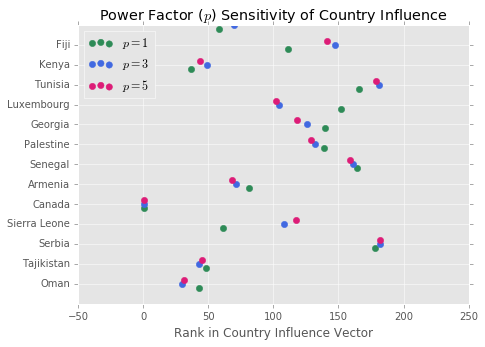

In [32]:
c=['seaGreen','royalBlue','#dd1c77']
levels=[1,3,5]
first=12
toplot=[]
tolabel=[]
fig=plt.figure(figsize=(7,5))
for j in range(len(levels)):
    [importancematrix,influencematrix]=dendro('00',1,levels[j])
    z=[np.mean(i) for i in influencematrix] #sum country influence on columns
    #if you wanted weighted influence, introduce weights here in the above mean
    s = pd.Series(1/np.array(z)) #need to 1/ to create inverse order
    s=s.rank(method='dense').values.astype(int)
    #s is a ranked array on which country ranks where in country influence 
    #we then composed the ordered vector of country influence
    influencevector=[0 for i in range(len(s))]
    for i in range(len(s)):
        influencevector[s[i]-1]=i
    for i in range(first):
        toplot.append(influencevector[i])
        tolabel.append(influencevector[i])
    plt.scatter(np.array(s),np.arange(len(s))-0.2+0.2*j,40,color=c[j],label=u'$p='+str(levels[j])+'$')
    ax=plt.gca()
    ax.set_ylim(-1,13)
    ax.set_yticks(range(13))
    ax.set_yticklabels([labeler[goodcountries[i-1]] for i in s])
    ax.set_xlabel("Rank in Country Influence Vector")
plt.legend(loc=2)
plt.title("Power Factor ($p$) Sensitivity of Country Influence")
plt.show()

In [33]:
z[influencevector[0]],z[influencevector[1]],z[influencevector[2]] #top 3 influences

(1.2986195165070991, 1.0021408092196542, 0.99026441296005818)

In [34]:
#country influence vector
for i in range(len(influencevector)):
    print i, goodcountries[influencevector[i]]

0 United States of America
1 United Kingdom
2 Netherlands
3 Italy
4 France
5 Jordan
6 Germany
7 Singapore
8 Saudi Arabia
9 China
10 India
11 Azerbaijan
12 Viet Nam
13 Liberia
14 Nigeria
15 South Africa
16 Venezuela (Bolivarian Republic of)
17 Republic of Korea
18 Cape Verde
19 Australia
20 Greece
21 Afghanistan
22 Indonesia
23 Algeria
24 Russian Federation
25 Switzerland
26 Trinidad and Tobago
27 Belgium
28 Malaysia
29 Brazil
30 Canada
31 Poland
32 Egypt
33 Colombia
34 Romania
35 Sweden
36 Ukraine
37 Norway
38 Bahrain
39 Portugal
40 Iraq
41 Thailand
42 Côte d'Ivoire
43 Argentina
44 Libyan Arab Jamahiriya
45 Gambia
46 Bulgaria
47 Qatar
48 Mexico
49 Panama
50 Malta
51 Latvia
52 Estonia
53 Morocco
54 Bahamas
55 Kazakhstan
56 New Zealand
57 Cyprus
58 Tajikistan
59 Austria
60 Israel
61 Martinique
62 Senegal
63 Ireland
64 Lesotho
65 Japan
66 Togo
67 Lithuania
68 Angola
69 Congo
70 Finland
71 Yemen 
72 Chile
73 China, Hong Kong Special Administrative Region
74 Oman
75 Maldives
76 Saint Lucia


Create energy cost by filling the matrix with the cost of row importing 1TWh from column. neglecting transport energy costs for now, this will be the extraction energy cost. Let us consider only solar for now. Try optimization with all three source, choose one with best objective value. 1TWh tier changes based on granurality.

In [151]:
#weighted resource class calculator
def re(dic,total):
    if dic!={}:
        i=max(dic.keys())
        mi=min(dic.keys())
        run=True
        keys=[]
        weights=[]
        counter=0
        while run:
            counter+=1 #safety break
            if counter>1000: run=False
            if i in dic:
                if total<dic[i]:
                    keys.append(i)
                    weights.append(total)
                    run=False
                else:
                    total-=dic[i]
                    keys.append(i)
                    weights.append(dic[i])
                    i-=1
            if i<mi: run=False
        if sum(weights)==0: return 0
        else: return np.average(keys,weights=weights)
    else: return 0

In [161]:
region=pd.read_excel(pop_path+'regions.xlsx').set_index('Country')

In [152]:
#load
aroei=json.loads(file(pop_path+'aroei.json','r').read())
groei=json.loads(file(pop_path+'groei.json','r').read())

In [153]:
#global eroei, due to state of technology
#http://www.sciencedirect.com/science/article/pii/S0301421513003856
eroei={
'oil':13,
'coal':27,
'gas':14,
'nuclear':10,
'biofuels':1.5,
'hydro':84,
'geo_other':22,
'pv':9,
'csp':5,
'wind':9 #was 24
}
#esoei
#http://pubs.rsc.org/en/content/articlepdf/2013/ee/c3ee41973h
#various, but especially CSP from https://en.wikipedia.org/wiki/EROEI
#http://link.springer.com/chapter/10.1007/978-3-319-02940-5_5#Sec18
#charlie hall says number are 5-7 for csp, but without additional costs of the supporting infrastructure

In [154]:
#average resource quality calculator for the globe
def update_aroei():
    global aroei
    aroei={}
    groei={}
    for c in res:
        for r in res[c]:
            if r not in groei: groei[r]={}
            for cl in res[c][r]['res']:
                if cl not in groei[r]: groei[r][cl]=0
                groei[r][cl]+=res[c][r]['res'][cl]
    for r in groei:
        x=[]
        y=[]
        for i in range(len(sorted(groei[r].keys()))):
            x.append(float(sorted(groei[r].keys())[i]))
            y.append(float(groei[r][sorted(groei[r].keys())[i]]))
        aroei[r]=np.average(x,weights=y)

In [47]:
#1Bdi - grid
def gridtestimator(country,partner):
    
    def electricitytrade(country,partner):
        scaler=1
        gridpartners=grid5['electricity']
        #existing trade partners
        if ((partner in gridpartners[country]) or (country in gridpartners[partner])): 
            scaler+=cost.loc[region.loc[country]]['egrid'].values[0]/2.0
        #neighbors, but need to build
        elif pop2iso[country] in c2neighbors:
            if (pop2iso[partner] in c2neighbors[pop2iso[country]]):
                scaler+=cost.loc[region.loc[country]]['grid'].values[0]/2.0*normdistance(country,partner)
        #not neighbors or partners but in the same region, need to build
        elif (region.loc[country][0]==region.loc[partner][0]):
            scaler+=cost.loc[region.loc[country]]['grid'].values[0]*3.0/2.0*normdistance(country,partner)
        #need to build supergrid, superlative costs
        else: scaler+=cost.loc[region.loc[country]]['grid'].values[0]*10.0/2.0*normdistance(country,partner)
        return scaler
    
    def ptltrade(country,partner):
        #ptg costs scale with distance
        scaler=1+cost.loc[11]['ptg']*normdistance(country,partner) 
        return scaler
    
    if ptltrade(country,partner)<electricitytrade(country,partner):
        return {"scaler":ptltrade(country,partner),"tradeway":"ptl"}
    else: return {"scaler":electricitytrade(country,partner),"tradeway":"grid"}

In [158]:
#1Bdii - storage &curtailment
def storagestimator(country):
    return cost.loc[region.loc[country]]['min'].values[0]
    #curtoversizer
def curtestimator(country):
    return cost.loc[region.loc[country]]['curt'].values[0]

In [49]:
#global benchmark eroei, due to state of technology
eroei0={
'oil':13,
'coal':27,
'gas':14,
'nuclear':10,
'biofuels':1.5,
'hydro':84,
'geo_other':22,
'pv':17.6,
'csp':10.2,
'wind':20.2 #was 24
}
#without esoei
#calibrated from global

# ALLINONE

In [169]:
gi={"open":{},"notrade":{}}

In [187]:
#initialize renewable totals for learning
total2015={'csp':0,'solar':0,'wind':0}
learning={'csp':0.04,'solar':0.04,'wind':0.02}
year=2015
for fuel in total2015:
    total2015[fuel]=np.nansum([np.nansum(data[partner][year]['energy'][fuel]['prod']['navg3'])\
                           for partner in goodcountries if fuel in data[partner][year]['energy']])

In [188]:
total2015

{'csp': 10.149336, 'solar': 24.5314267692332, 'wind': 545.61126879653227}

In [201]:
#scenario
sd='00'

#import resources

###################################
###################################
#load resources
predata=json.loads(file(pop_path+'maps/newres.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}
print 'scenario',sd,'loaded resources',
###################################
###################################
#load demand2
predata=json.loads(file(pop_path+'demand2.json','r').read())
demand2={}
for c in predata:
    demand2[c]={}
    for year in predata[c]:
        demand2[c][int(year)]=predata[c][year]
predata={}
print 'demand',
###################################
###################################
#load tradealpha d
predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}
print 'tradedata',
###################################
###################################
#reload impex and normalize
predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}
print 'impex',
###################################
###################################
#load latest savedata
#we dont change the data for now, everything is handled through trade
predata=json.loads(file(pop_path+'savedata5.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}
print 'data'
###################################
###################################

 scenario 00 loaded resources demand2 tradedata impex data


In [76]:
###################################
###################################
###################################
###################################
gi={"open":{},"notrade":{}}
eroei={}
once=True
release={} #release reserves
for year in range(2015,2040):
    print year
    #SET PARAMETERS
    #------------------------------------------------
    #reset balance
    balance={}
    #recalculate balances
    for c in goodcountries:
        balance[c]=0
        if c in tradealpha:
            f1=0
            for fuel in tradealpha[c][year]:
                if 'Import' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Import'].values())])
                if 'Re-Import' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Re-Import'].values())])
                if 'Export' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Export'].values())])
                if 'Re-Export' in tradealpha[c][year][fuel]: 
                    f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Re-Export'].values())])
                if fuel in data[c][year]['energy']:
                    f1=np.nansum([f1,data[c][year]['energy'][fuel]['prod']['navg3']])
            balance[c]=-(demand2[c][year]*8760*1e-12-f1)

    #1A
    avgbalance=np.mean(balance.values())
    needers=sorted([c for c in balance if balance[c]<0])[:]
    givers=sorted([c for c in balance if balance[c]>avgbalance])
    #update global technical eroei
    fuel2={'csp':'csp','pv':'solar','wind':'wind'}
    for t in fuel2:
        fuel=fuel2[t]
        eroei[t]=eroei0[t]*(np.nansum([np.nansum(data[partner][year]['energy'][fuel]['prod']['navg3'])\
                       for partner in goodcountries if fuel in data[partner][year]['energy']])*1.0/total2015[fuel])**learning[fuel]              
    #################################################
    #1B
    #import random
    #random.seed(sd*year)
    #shuffle order of parsing countries
    #random.shuffle(needers)
    #------------------------------------------------
    #1Ba
    #country for parsing the needers list
    for counter in range(len(needers)):
        country=needers[counter]
        #print country,
        need=-balance[country] #as a convention switch to positive, defined as 'need'
        mintier=1 #in TWh
        midtier=10 #mid tier TWh
        hitier=100 #mid tier TWh
        if need>hitier: tiernumber=10
        elif need>midtier: tiernumber=5
        elif need>mintier: tiernumber=3
        else: tiernumber=1
        #OVERWRITE TIERNUMBER
        tiernumber=3

        #MIN SHARE LIMIT
        homeshare={'csp':False,'pv':False,'wind':False}
        minshare=0.10
        homesum=np.sum([data[country][year]['energy'][ii]['prod']['navg3'] \
               for ii in data[country][year]['energy'] if ii not in {"nrg","nrg_sum"}])
        if homesum>0:
            for fuel in {'csp','pv','wind'}:
                if fuel2[fuel] in data[country][year]['energy']:
                    if (minshare>data[country][year]['energy'][fuel2[fuel]]['prod']['navg3']*1.0/homesum):
                        homeshare[fuel]=True    
        #if all are fulfilled, no need for the constraint
        if np.array(homeshare.values()).all(): homeshare={'csp':False,'pv':False,'wind':False}

        for tier in range(tiernumber):
            tierneed=need*1.0/tiernumber
            #------------------------------------------------
            #1Bb
            costvector={}
            update_aroei() #update sate of the resources globally to be able to rank between technologies
            for partner in givers+[country]:
                if partner in res:
                    for fuel in {'csp','pv','wind'}:
                        #if satisfies min share constraint
                        if not homeshare[fuel]:
                            #at each time step you much import each fuel typeat least once
                            if res[partner][fuel]['res']!={}:
                                #query if giver can ramp up production this fast
                                #max investment cannot exceed rampuplimit (=15%)
                                ok=False
                                su=np.sum([data[partner][year]['energy'][ii]['prod']['navg3'] \
                                           for ii in data[partner][year]['energy'] if ii not in {"nrg","nrg_sum"}])
                                if su*rampuplimit>tierneed: #not tierneed
                                    if fuel2[fuel] in data[partner][year]['energy']:
                                        if np.isnan(data[partner][year]['energy'][fuel2[fuel]]['prod']['navg3']): ok=True
                                        elif data[partner][year]['energy'][fuel2[fuel]]['prod']['navg3']==0: ok=True
                                        elif (tierneed<data[partner][year]['energy'][fuel2[fuel]]['prod']['navg3']*fuelrampuplimit):ok=True
                                            #again not tierneed
                                        else: ok=False
                                    else: ok=True #new resource, build it

                                if ok:
                                    #rq (resource query) returns the average resource class at which this tierneed can be provided
                                    #we multiply by the storage/curtailment needs
                                    storagescaler=(1+storagestimator(partner)+curtestimator(partner))
                                    rq=re(res[partner][fuel]['res'],tierneed)/storagescaler
                                    #the costvector takes the resource class and converts it to eroei by comparing it 
                                    #the average resource class at a known point with a know eroei (at start in 2015)
                                    #we are looking figh highvalues, as a marginal quality of resource
                                    costvector[fuel+'_'+partner]=(rq/aroei[fuel]*eroei[fuel]) #normalized resource quality over eroei

            if costvector=={}: 
                print 'impossible to fullfill demand', country, ' in tier ', tier
            #1Bbi - norlmalize costvector to be able to compare with trade influence
            else:
                normcostvector=copy.deepcopy(costvector)
                for i in normcostvector:
                    costvector[i]/=np.nanmean(costvector.values())
                #1Bbii - create costfactor, weights are tweakable
                costfactor={}
                for key in costvector:
                    partner=key[key.find('_')+1:]
                    costfactor[key]=((costvector[key]**2)*(influence(country,partner,selfinfluence)**2))**(1/4.0)
                    #costfactor[key]=costvector[key]

                    #The geometric mean is more appropriate than the arithmetic mean for describing proportional growth, 
                    #both exponential growth (constant proportional growth) and varying growth; i
                    #n business the geometric mean of growth rates is known as the compound annual growth rate (CAGR). 
                    #The geometric mean of growth over periods yields the equivalent constant growth rate that would 
                    #yield the same final amount.

                    #influence(country,partner,2) - third parameter : relative importance of 
                    #self comparted to most influential country

                #1Bc - choose partner
                best=max(costfactor, key=costfactor.get)
                tradepartner=best[best.find('_')+1:]
                tradefuel=best[:best.find('_')]
                #------------------------------------------------
                #1Be - IMPLEMENT TRADE
                lt=int(20+random.random()*15) #lifetime
                #otherwise we have to implement resource updating
                #1Beii - Reduce provider reserves within year
                levels=res[tradepartner][tradefuel]['res'].keys()
                level=max(levels)
                tomeet=tierneed*1.0
                #record release lt years in the future
                if year+lt not in release:release[year+lt]={}
                if tradepartner not in release[year+lt]:release[year+lt][tradepartner]={}
                if tradefuel not in release[year+lt][tradepartner]:release[year+lt][tradepartner][tradefuel]={}
                #hold resources for lt
                while level>min(levels): 
                    if level not in res[tradepartner][tradefuel]['res']: level-=1
                    elif res[tradepartner][tradefuel]['res'][level]<tomeet:
                        tomeet-=res[tradepartner][tradefuel]['res'][level]
                        if level not in release[year+lt][tradepartner][tradefuel]:
                            release[year+lt][tradepartner][tradefuel][level]=0
                        release[year+lt][tradepartner][tradefuel][level]+=res[tradepartner][tradefuel]['res'][level]
                        res[tradepartner][tradefuel]['res'].pop(level)
                        level-=1
                    else:
                        res[tradepartner][tradefuel]['res'][level]-=tomeet
                        if level not in release[year+lt][tradepartner][tradefuel]:
                            release[year+lt][tradepartner][tradefuel][level]=0
                        release[year+lt][tradepartner][tradefuel][level]+=tomeet
                        level=0
                #------------------------------------------------
                #1Be-implement country trade
                #only production capacity stays, trade does not have to
                gyear=int(1.0*year)
                for year in range(gyear,min(2100,gyear+lt)):
                    #update globalinvestment
                    if year not in globalinvestment:globalinvestment[year]={"net":0,"inv":0}
                    globalinvestment[year]["net"]+=tierneed
                    globalinvestment[year]["inv"]+=tierneed/normcostvector[best]
                    #add production
                    if tradefuel not in data[tradepartner][year]['energy']:
                        data[tradepartner][year]['energy'][tradefuel]={'prod':{'navg3':0},'cons':{'navg3':0}}
                    data[tradepartner][year]['energy'][tradefuel]['prod']['navg3']+=tierneed
                    #add storage
                    if tradefuel not in {'csp'}:
                        if 'storage' not in data[tradepartner][year]['energy']:
                            data[tradepartner][year]['energy']['storage']={'prod':{'navg3':0},'cons':{'navg3':0}}
                        data[tradepartner][year]['energy']['storage']['prod']['navg3']+=tierneed*storagestimator(tradepartner)
                        data[tradepartner][year]['energy']['storage']['cons']['navg3']+=tierneed*storagestimator(tradepartner)
                year=gyear

                #add consumption
                if tradefuel not in data[country][year]['energy']:
                    data[country][year]['energy'][tradefuel]={'prod':{'navg3':0},'cons':{'navg3':0}}
                data[country][year]['energy'][tradefuel]['cons']['navg3']+=tierneed
                #add trade flows if not self
                key=gridtestimator(country,partner)['tradeway']+'_'+tradefuel
                if country!=tradepartner:
                    #add import flow
                    if key not in tradealpha[country][year]:tradealpha[country][year][key]={}
                    if 'Import' not in tradealpha[country][year][key]:tradealpha[country][year][key]["Import"]={}
                    if str(pop2iso[tradepartner]) not in tradealpha[country][year][key]["Import"]:
                        tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]=0
                    tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]+=tierneed
                    #add export flow
                    if key not in tradealpha[tradepartner][year]:tradealpha[tradepartner][year][key]={}
                    if 'Export' not in tradealpha[tradepartner][year][key]:tradealpha[tradepartner][year][key]["Export"]={}
                    if str(pop2iso[country]) not in tradealpha[tradepartner][year][key]["Export"]:
                        tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]=0
                    tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]+=tierneed

                #record trade to influence - counld be weighted, deaful is 10%
                updatenormimpex(country,tradepartner,'Import',tierneed/need) 
                updatenormimpex(tradepartner,country,'Export',tierneed/need) 

#save data for processed countries
print 'saving...'
if selfinfluence==10: 
    sde=10
    sdk="open"
else: 
    sde=20
    sdk="notrade"
gi[sdk]=globalinvestment
save3(sde,goodcountries)
file('E:/Dropbox/Public/datarepo/Set/gi.json','w').write(json.dumps(gi)) 
print 'done',sde

scenario 3 loaded resources demand2 tradedata impex data
2015
impossible to fullfill demand Canada  in tier  1
impossible to fullfill demand Canada  in tier  2
impossible to fullfill demand Libyan Arab Jamahiriya  in tier  1
impossible to fullfill demand Libyan Arab Jamahiriya  in tier  2
impossible to fullfill demand Saudi Arabia  in tier  1
impossible to fullfill demand Saudi Arabia  in tier  2
impossible to fullfill demand United States of America  in tier  0
impossible to fullfill demand United States of America  in tier  1
impossible to fullfill demand United States of America  in tier  2
2016
impossible to fullfill demand Libyan Arab Jamahiriya  in tier  0
impossible to fullfill demand Libyan Arab Jamahiriya  in tier  1
impossible to fullfill demand Libyan Arab Jamahiriya  in tier  2
impossible to fullfill demand United States of America  in tier  0
impossible to fullfill demand United States of America  in tier  1
impossible to fullfill demand United States of America  in tier  

In [ ]:
###################################
###################################
###################################
###################################
gi={"open":{},"notrade":{}}
eroei={}
once=True
rampuplimit=0.08 #overall generation ramp up limit
fuelrampuplimit=0.25 #inditvidual fuel ramp up limit
for selfinfluence in {1,10}:
    globalinvestment={}
    release={} #release reserves
    for year in range(2015,2040):
        print year
        #SET PARAMETERS
        #------------------------------------------------
        #release reserves
        if year in release:
            for c in release[year]:
                for fuel in release[year][c]:
                    for level in release[year][c][fuel]:
                        if level in res[c][fuel]['res']:
                            res[c][fuel]['res'][level]+=release[year][c][fuel][level]
                        else: res[c][fuel]['res'][level]=release[year][c][fuel][level]
        #reset balance
        balance={}
        #recalculate balances
        for c in goodcountries:
            balance[c]=0
            if c in tradealpha:
                f1=0
                for fuel in tradealpha[c][year]:
                    if 'Import' in tradealpha[c][year][fuel]: 
                        f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Import'].values())])
                    if 'Re-Import' in tradealpha[c][year][fuel]: 
                        f1=np.nansum([f1,sum(tradealpha[c][year][fuel]['Re-Import'].values())])
                    if 'Export' in tradealpha[c][year][fuel]: 
                        f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Export'].values())])
                    if 'Re-Export' in tradealpha[c][year][fuel]: 
                        f1=np.nansum([f1,-sum(tradealpha[c][year][fuel]['Re-Export'].values())])
                    if fuel in data[c][year]['energy']:
                        f1=np.nansum([f1,data[c][year]['energy'][fuel]['prod']['navg3']])
                balance[c]=-(demand2[c][year]*8760*1e-12-f1)
                
        #1A
        avgbalance=np.mean(balance.values())
        needers=sorted([c for c in balance if balance[c]<0])[:]
        givers=sorted([c for c in balance if balance[c]>avgbalance])
        #update global technical eroei
        fuel2={'csp':'csp','pv':'solar','wind':'wind'}
        for t in fuel2:
            fuel=fuel2[t]
            eroei[t]=eroei0[t]*(np.nansum([np.nansum(data[partner][year]['energy'][fuel]['prod']['navg3'])\
                           for partner in goodcountries if fuel in data[partner][year]['energy']])*1.0/total2015[fuel])**learning[fuel]              
        #################################################
        #1B
        #import random
        #random.seed(sd*year)
        #shuffle order of parsing countries
        #random.shuffle(needers)
        #------------------------------------------------
        #1Ba
        #country for parsing the needers list
        for counter in range(len(needers)):
            country=needers[counter]
            #print country,
            need=-balance[country] #as a convention switch to positive, defined as 'need'
            mintier=1 #in TWh
            midtier=10 #mid tier TWh
            hitier=100 #mid tier TWh
            if need>hitier: tiernumber=10
            elif need>midtier: tiernumber=5
            elif need>mintier: tiernumber=3
            else: tiernumber=1
            #OVERWRITE TIERNUMBER
            tiernumber=3

            #MIN SHARE LIMIT
            homeshare={'csp':False,'pv':False,'wind':False}
            minshare=0.10
            homesum=np.sum([data[country][year]['energy'][ii]['prod']['navg3'] \
                   for ii in data[country][year]['energy'] if ii not in {"nrg","nrg_sum"}])
            if homesum>0:
                for fuel in {'csp','pv','wind'}:
                    if fuel2[fuel] in data[country][year]['energy']:
                        if (minshare>data[country][year]['energy'][fuel2[fuel]]['prod']['navg3']*1.0/homesum):
                            homeshare[fuel]=True    
            #if all are fulfilled, no need for the constraint
            if np.array(homeshare.values()).all(): homeshare={'csp':False,'pv':False,'wind':False}
            
            for tier in range(tiernumber):
                tierneed=need*1.0/tiernumber
                #------------------------------------------------
                #1Bb
                costvector={}
                update_aroei() #update sate of the resources globally to be able to rank between technologies
                for partner in givers+[country]:
                    if partner in res:
                        for fuel in {'csp','pv','wind'}:
                            #if satisfies min share constraint
                            if not homeshare[fuel]:
                                #at each time step you much import each fuel typeat least once
                                if res[partner][fuel]['res']!={}:
                                    #query if giver can ramp up production this fast
                                    #max investment cannot exceed rampuplimit (=15%)
                                    ok=False
                                    su=np.sum([data[partner][year]['energy'][ii]['prod']['navg3'] \
                                               for ii in data[partner][year]['energy'] if ii not in {"nrg","nrg_sum"}])
                                    if su*rampuplimit>tierneed: #not tierneed
                                        if fuel2[fuel] in data[partner][year]['energy']:
                                            if np.isnan(data[partner][year]['energy'][fuel2[fuel]]['prod']['navg3']): ok=True
                                            elif data[partner][year]['energy'][fuel2[fuel]]['prod']['navg3']==0: ok=True
                                            elif (tierneed<data[partner][year]['energy'][fuel2[fuel]]['prod']['navg3']*fuelrampuplimit):ok=True
                                                #again not tierneed
                                            else: ok=False
                                        else: ok=True #new resource, build it

                                    if ok:
                                        #rq (resource query) returns the average resource class at which this tierneed can be provided
                                        #we multiply by the storage/curtailment needs
                                        storagescaler=(1+storagestimator(partner)+curtestimator(partner))
                                        rq=re(res[partner][fuel]['res'],tierneed)/storagescaler
                                        #the costvector takes the resource class and converts it to eroei by comparing it 
                                        #the average resource class at a known point with a know eroei (at start in 2015)
                                        #we are looking figh highvalues, as a marginal quality of resource
                                        costvector[fuel+'_'+partner]=(rq/aroei[fuel]*eroei[fuel]) #normalized resource quality over eroei

                if costvector=={}: 
                    print 'impossible to fullfill demand', country, ' in tier ', tier
                #1Bbi - norlmalize costvector to be able to compare with trade influence
                else:
                    normcostvector=copy.deepcopy(costvector)
                    for i in normcostvector:
                        costvector[i]/=np.nanmean(costvector.values())
                    #1Bbii - create costfactor, weights are tweakable
                    costfactor={}
                    for key in costvector:
                        partner=key[key.find('_')+1:]
                        costfactor[key]=((costvector[key]**2)*(influence(country,partner,selfinfluence)**2))**(1/4.0)
                        #costfactor[key]=costvector[key]

                        #The geometric mean is more appropriate than the arithmetic mean for describing proportional growth, 
                        #both exponential growth (constant proportional growth) and varying growth; i
                        #n business the geometric mean of growth rates is known as the compound annual growth rate (CAGR). 
                        #The geometric mean of growth over periods yields the equivalent constant growth rate that would 
                        #yield the same final amount.

                        #influence(country,partner,2) - third parameter : relative importance of 
                        #self comparted to most influential country

                    #1Bc - choose partner
                    best=max(costfactor, key=costfactor.get)
                    tradepartner=best[best.find('_')+1:]
                    tradefuel=best[:best.find('_')]
                    #------------------------------------------------
                    #1Be - IMPLEMENT TRADE
                    lt=int(20+random.random()*15) #lifetime
                    #otherwise we have to implement resource updating
                    #1Beii - Reduce provider reserves within year
                    levels=res[tradepartner][tradefuel]['res'].keys()
                    level=max(levels)
                    tomeet=tierneed*1.0
                    #record release lt years in the future
                    if year+lt not in release:release[year+lt]={}
                    if tradepartner not in release[year+lt]:release[year+lt][tradepartner]={}
                    if tradefuel not in release[year+lt][tradepartner]:release[year+lt][tradepartner][tradefuel]={}
                    #hold resources for lt
                    while level>min(levels): 
                        if level not in res[tradepartner][tradefuel]['res']: level-=1
                        elif res[tradepartner][tradefuel]['res'][level]<tomeet:
                            tomeet-=res[tradepartner][tradefuel]['res'][level]
                            if level not in release[year+lt][tradepartner][tradefuel]:
                                release[year+lt][tradepartner][tradefuel][level]=0
                            release[year+lt][tradepartner][tradefuel][level]+=res[tradepartner][tradefuel]['res'][level]
                            res[tradepartner][tradefuel]['res'].pop(level)
                            level-=1
                        else:
                            res[tradepartner][tradefuel]['res'][level]-=tomeet
                            if level not in release[year+lt][tradepartner][tradefuel]:
                                release[year+lt][tradepartner][tradefuel][level]=0
                            release[year+lt][tradepartner][tradefuel][level]+=tomeet
                            level=0
                    #------------------------------------------------
                    #1Be-implement country trade
                    #only production capacity stays, trade does not have to
                    gyear=int(1.0*year)
                    for year in range(gyear,min(2100,gyear+lt)):
                        #update globalinvestment
                        if year not in globalinvestment:globalinvestment[year]={"net":0,"inv":0}
                        globalinvestment[year]["net"]+=tierneed
                        globalinvestment[year]["inv"]+=tierneed/normcostvector[best]
                        #add production
                        if tradefuel not in data[tradepartner][year]['energy']:
                            data[tradepartner][year]['energy'][tradefuel]={'prod':{'navg3':0},'cons':{'navg3':0}}
                        data[tradepartner][year]['energy'][tradefuel]['prod']['navg3']+=tierneed
                        #add storage
                        if tradefuel not in {'csp'}:
                            if 'storage' not in data[tradepartner][year]['energy']:
                                data[tradepartner][year]['energy']['storage']={'prod':{'navg3':0},'cons':{'navg3':0}}
                            data[tradepartner][year]['energy']['storage']['prod']['navg3']+=tierneed*storagestimator(tradepartner)
                            data[tradepartner][year]['energy']['storage']['cons']['navg3']+=tierneed*storagestimator(tradepartner)
                    year=gyear

                    #add consumption
                    if tradefuel not in data[country][year]['energy']:
                        data[country][year]['energy'][tradefuel]={'prod':{'navg3':0},'cons':{'navg3':0}}
                    data[country][year]['energy'][tradefuel]['cons']['navg3']+=tierneed
                    #add trade flows if not self
                    key=gridtestimator(country,partner)['tradeway']+'_'+tradefuel
                    if country!=tradepartner:
                        #add import flow
                        if key not in tradealpha[country][year]:tradealpha[country][year][key]={}
                        if 'Import' not in tradealpha[country][year][key]:tradealpha[country][year][key]["Import"]={}
                        if str(pop2iso[tradepartner]) not in tradealpha[country][year][key]["Import"]:
                            tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]=0
                        tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]+=tierneed
                        #add export flow
                        if key not in tradealpha[tradepartner][year]:tradealpha[tradepartner][year][key]={}
                        if 'Export' not in tradealpha[tradepartner][year][key]:tradealpha[tradepartner][year][key]["Export"]={}
                        if str(pop2iso[country]) not in tradealpha[tradepartner][year][key]["Export"]:
                            tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]=0
                        tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]+=tierneed

                    #record trade to influence - counld be weighted, deaful is 10%
                    updatenormimpex(country,tradepartner,'Import',tierneed/need) 
                    updatenormimpex(tradepartner,country,'Export',tierneed/need) 

    #save data for processed countries
    print 'saving...'
    if selfinfluence==10: 
        sde=10
        sdk="open"
    else: 
        sde=20
        sdk="notrade"
    gi[sdk]=globalinvestment
    save3(sde,goodcountries)
    file('E:/Dropbox/Public/datarepo/Set/gi.json','w').write(json.dumps(gi)) 
    print 'done',sde